In [1]:
import spacy
import en_core_web_sm
from shapely.geometry import Point

In [2]:
import text_to_places
from text_to_places import *

In [3]:
nlp = en_core_web_sm.load()

In [5]:
import wikipedia
doc = wikipedia.page("Charles_Darwin")
text = doc.content

In [329]:

#del DependencyParser
#from spacy.pipeline import DependencyParser
# #parser = DependencyParser(nlp.vocab)
# d = nlp(rev.content.strip('\n'))
# from spacy.symbols import VERB, nsubj, pobj, PROPN
# for x in d:
#     if x.ent_type_ in ['GPE', 'LOC'] and x.pos_ == 'PROPN' and x.dep_ == 'pobj' and x.head.text in ['in', 'at']:
#            # print(x, x.pos_)
#             h = x.head.head
#             print(h.pos_)
#             if h.pos_ == 'VERB':
#                 rest = h.subtree
#                 print(' '.join([w.text for w in rest]))
#                 print([c for c in h.children if c.dep_ == 'nsubj'], '\n')


In [38]:
#file = 'don_quixote.txt'
#text = open(file, 'r', encoding='UTF-8').read()


In [7]:
locations = text_to_places.getLocations(text)
print(locations)

[Shrewsbury, Shropshire, Mount, Shrewsbury, Shropshire, UK, the Firth of Forth, Lamarck, Europe, Cambridge, Cambridge, Wales, Wales, South America, Cambridge, Jago, Cape Verde, Brazil, Patagonia, Megatherium, England, England, England, Chile, Andes, Galápagos Islands, Chile, Australia, Islands, Cape Town, the Falkland Islands, Falmouth, Cornwall, Shrewsbury, Cambridge, London, Megatherium, Glyptodon, South America, Cambridge, Galapagos, London, Geoffroy, Macrauchenia, Galápagos, Shrewsbury, Scotland, Shrewsbury, Marry, London, London, London, London, Cirripedia, Borneo, Dublin, Cambridge, Sedgwick, Britain, Orchids, the Vegetable Kingdom, Mendoza, Argentina, Cambridge, Mount Darwin, Andes, Australia, Australia, the Galápagos Islands, UK, London, Cambridge, Denmark, Sweden, USA, Cambridge, Australia, England, Britain, Evolutionary, Britain, America, Canada, Australia, the United States, South America, Cambridge]


In [8]:
import geocoder

In [9]:
# how to make this faster?
latlngs = getLatLng(locations)

In [11]:
import geopandas as gpd
import pandas as pd

In [12]:
latlngs

{'Shrewsbury': <shapely.geometry.point.Point at 0x7f4e7d6ef908>,
 'Shropshire': <shapely.geometry.point.Point at 0x7f4e7964a710>,
 'Mount': <shapely.geometry.point.Point at 0x7f4e7964a588>,
 'UK': <shapely.geometry.point.Point at 0x7f4e7964a630>,
 'the Firth of Forth': <shapely.geometry.point.Point at 0x7f4e7964a828>,
 'Lamarck': <shapely.geometry.point.Point at 0x7f4e7964a860>,
 'Europe': <shapely.geometry.point.Point at 0x7f4e7964a5c0>,
 'Cambridge': <shapely.geometry.point.Point at 0x7f4e7964a5f8>,
 'Wales': <shapely.geometry.point.Point at 0x7f4e7964a668>,
 'South America': <shapely.geometry.point.Point at 0x7f4e7964a4e0>,
 'Jago': <shapely.geometry.point.Point at 0x7f4e7964a9e8>,
 'Cape Verde': <shapely.geometry.point.Point at 0x7f4e7964a550>,
 'Brazil': <shapely.geometry.point.Point at 0x7f4e7964a0f0>,
 'Patagonia': <shapely.geometry.point.Point at 0x7f4e7964a128>,
 'England': <shapely.geometry.point.Point at 0x7f4e7964aa58>,
 'Chile': <shapely.geometry.point.Point at 0x7f4e7964a

In [13]:
import map_places
from map_places import *

In [14]:
gdf = getDataFrame(latlngs)
gdf

,Coordinates
Shrewsbury,POINT (-2.7540094 52.7078866)
Shropshire,POINT (-2.64356407027027 52.65233935)
Mount,POINT (14.4476911 35.8885993)
UK,POINT (-3.2765753 54.7023545)
the Firth of Forth,POINT (-3.2299899 56.0208894)
Lamarck,POINT (-71.4601806 -33.0538669)
Europe,POINT (10 51)
Cambridge,POINT (0.1235817 52.2034823)
Wales,POINT (-3.73893 52.2928116)
South America,POINT (-61.0006565 -21.0002179)


In [17]:
import matplotlib.pyplot as plt

In [19]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

/home/jfh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


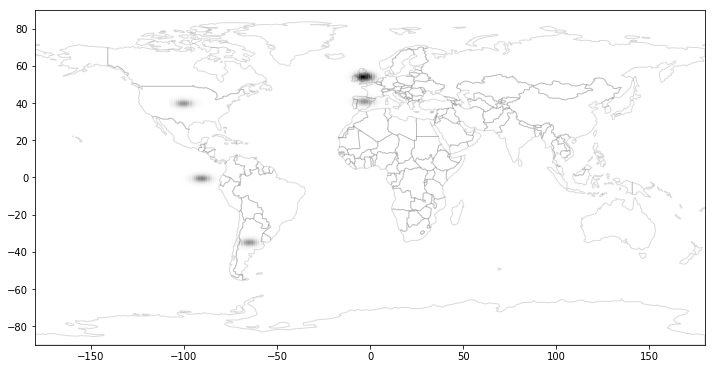

In [63]:
%matplotlib inline
import numpy as np
from scipy import ndimage

import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
#pylab.rcParams['figure.figsize'] = 8, 6

ax = world.plot(
    color='white', edgecolor='black', figsize= (12,12), alpha=0.15
)

def heatmap(d, bins=(200,200), smoothing=3, cmap='Greys'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    #extent = (-180,180,-90,90)
    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    #plt.colorbar()
    plt.gca().invert_yaxis()
    
    plt.xlim(-180, 180)
    plt.ylim(-90, 90)
    plt.show()
    
heatmap(gdf)

In [24]:
# ax = world.plot(
#     color='white', edgecolor='black', figsize= (12,12)
# )

# gdf.plot(ax=ax, color='red')
# for idx,row in gdf.iterrows():
#     text_coords = [arr.tolist()[0] for arr in row.Coordinates.xy]
#     plt.annotate(s=idx, xy=text_coords, horizontalalignment='center', size="medium")

# plt.xlim(-180, 180)
# plt.ylim(-90, 90)
# plt.show()